## 부스팅
* 배깅처럼 무작위로 표본을 추출해서 분석하는 것보다 약간의 가능성이 높은 규칙을 결합시켜 보다 정확한 예측모델을 만들어 내는 것을 의미
* 즉, **약한 모델** 여러개를 결합시켜 **강한 모델**을 만들어 낸다.
    + 이전 분류기가 틀린부분을 적응형으로 바꿔가며 잘못 분류되는 데이터를 올바르게 분류할 수 있도록 개선
* 또한, 배깅은 여러 분류기를 병렬로 연결해서 각 분류기로 부터 얻어진 결과를 한번에 모두 고려 -> 각 분류기가 학습시 상호 영향을 주지않음
* 반면, 부스팅은 순차적으로 연결해서 전 단계 분류기의 결과가 다음 단계의 분류기의 학습과 결과에 영향을 준다.
* sklearn에서는 GradientBoostingClassifier를 제공
* 다양한 부스팅 분류기
    + AdaBoost    : 가중치 기반 부스팅 기법
    + GrandientBoost : 잔여오차 기반 부스팅 기법
    + XGBoost     : GB 개량 부스팅 기법
    + LightGBM    : XGB 개량 부스팅 기법 (추천!)

<img src = 'img/boosting.png'>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


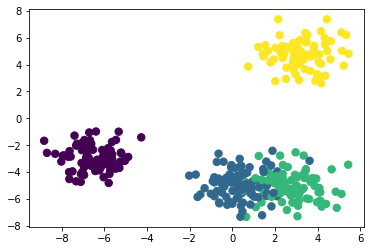

In [19]:
# 테스트용 데이터 생성 1및 시각화
X, y = make_blobs(n_samples=350, centers=4, random_state=2111121010, cluster_std=1.0)

plt.scatter(X[:,0], X[:,1], c=y, s=55)

In [20]:
# 데이터 분할
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, stratify=y, test_size = 0.3,random_state=2111121010)

In [21]:
# 의사결정나무 분류기 분석
dtc = DecisionTreeClassifier()
dtc.fit(Xtrain, ytrain)
pred = dtc.predict(Xtest)
dtc.score(Xtrain,  ytrain), accuracy_score(ytest, pred)

(1.0, 0.9142857142857143)

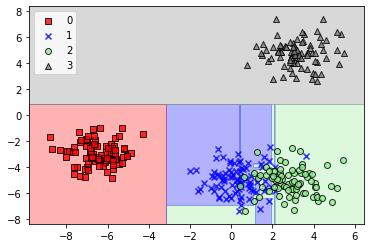

In [54]:
# 시각화 
import mldlpy3
mldlpy3.plot_decision_regions(X,y, dtc)

In [22]:
# 랜덤포레스트 분류기 분석
rfc = RandomForestClassifier()
rfc.fit(Xtrain, ytrain)
pred = rfc.predict(Xtest)
rfc.score(Xtrain, ytrain), accuracy_score(ytest, pred)

(1.0, 0.9333333333333333)

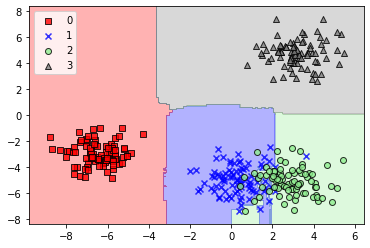

In [28]:
# 시각화
mldlpy3.plot_decision_regions(X,y,rfc)

In [44]:
# 아다부스트 분류기
# AdaBoostClassifier(분류기, 옵션)
# n_estimators : 분류기 갯수
# learning_rate : 학습률 지정 
# algorithm : 학습시 사용할 알고리즘
#             SAMME.R : soft voting 방식으로 가중치 부여 (확률)
#             SAMME   : hard voting 방식으로 가중치 부여 (값)
adc = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=100, learning_rate=0.2, algorithm='SAMME.R')
adc.fit(Xtrain, ytrain)
pred = adc.predict(Xtest)
dtc.score(Xtrain, ytrain), accuracy_score(ytest, pred)

(1.0, 0.9238095238095239)

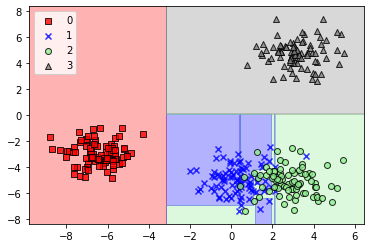

In [42]:
mldlpy3.plot_decision_regions(X,y,adc)

In [53]:
# 그라디언부스트 분류기
gdc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.006, max_depth=3)
# gdc = GradientBoostingClassifier(n_estimators=100)
gdc.fit(Xtrain, ytrain)
pred = gdc.predict(Xtest)
dtc.score(Xtrain, ytrain), accuracy_score(ytest, pred)

(1.0, 0.9523809523809523)

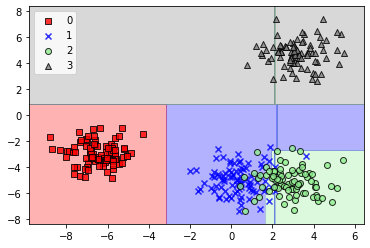

In [51]:
mldlpy3.plot_decision_regions(X,y,gdc)

## XGBoost
* 캐글 데이터 분석 경진대호히 우승자들이 자주 사용했던 분석기
* GBM 분석기법 대비 속도와 성능을 향상 시켰다.
* XBoost 핵심 라이브러리는 c/c++로 작성된다.
    + 따라서, sklearn에서 연동하려면 래퍼클래스를 사용해야 한다.
* pip install xgboost

In [56]:
# ! pip install xgboost

In [63]:
import xgboost as xgb
xgb.__version__

'1.5.0'

## XGBoost 분류기 설정
* 기본 분류기와 차이점은 XGBoost만을 위한 별도 학습용/평가용 객체(DMatrix)를 생성해야 한다.

In [64]:
dmtrain = xgb.DMatrix(data=Xtrain, label=ytrain)
dmtest = xgb.DMatrix(data=Xtest, label=ytest)

## 분류기 반복횟수/매개변수 지정 
* eta : learning_rate와 유사 
* objective : 분류시 사용할 목적함수 지정
    + 'reg': 'linear'  : 회귀
    + 'binary':'logistic' : 이진분류
    + 'multi:softmax'     : 다중분류, hard voting
    + 'multi:softprob'    : 다중분류, soft voting
* eval_metric : 오차 검증시 사용할 함수 지정
    + 'rmse' : 회귀분석시 평균제곱근 오차 사용
    + 'mae'  : 회귀분석시 평균절대값 오차 사용
    + 'logloss' : 이진분류분석시 최대우도 사용
    + 'error'   : 이진분류분석시 분류오차율 사용
    + 'mlogloss' : 다중분류분석시 최대우도 사용
    + 'merror'  : 다중분류분석시 분류오차율 사용
    + 'auc' : 분류분석시 auc 사용
* early_stopping : eval_metric에 의해 성능개선이 없을 경우, 분석을 중단할 최대 반복 횟수 

In [70]:
num_rounds = 500
params = {'max_depth':3, 'eta':0.1, 'objective':'multi:softmax', 'eval_metric':'mlogloss', 'early_stopping':50, 'num_class':4}

In [73]:
wlist = [(dmtrain, 'train'), (dmtest, 'test')]
xgb_model = xgb.train(params, dmtrain, num_rounds, evals=wlist, verbose_eval=0)
pred = xgb_model.predict(dmtest)
accuracy_score(pred, ytest)

[11:34:33] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




0.9333333333333333

In [77]:
## sklearn 래퍼클래스로 XGBoost분류기 분석
from xgboost import XGBClassifier

xgbc = XGBClassifier(slient=False, n_estimators=100, learning_rate=0.1, max_depth=3, objective='multi:softmax', booster='gbtree')
xgbc.fit(Xtrain, ytrain, eval_metric='mlogloss')  # early_stopping_rounds=50

pred = xgbc.predict(Xtest)
accuracy_score(pred, ytest)

[11:42:24] WARNING: ../src/learner.cc:576: 
Parameters: { "slient" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




0.9333333333333333

## LightGBM
* lightgbm.readthedocs.io
* 부스팅 계열 분석 알고리즘에서 가장 각광받는 분류기
* XGB는 다른 알고리즘보다 성능이 좋지만 느리고 메모리를 많이 사용한다는 단점이 존재
* 그에 비해 LGB는 속도도 빠르고 메모리도 작게 사용 
    + 즉, XGB의 단점을 보완하고 장점을 수용한 분류기


In [81]:
# ! pip install lightgbm

In [83]:
import lightgbm as lgb

lgb.__version__

'3.3.1'

## LightGBM 분류기 설정
* 기존 분류기와 차이점은 LughtGB만을 위한 별도 학습/평가용 객체를 생성해야함
* Dataset이라는 함수 사용

In [90]:
lgbtrain = lgb.Dataset(Xtrain, label=ytrain)
lgbtest = lgb.Dataset(Xtest, label=ytest)

In [99]:
# 분류기 반복횟수/매개변수 지정
params = {'max_depth':3, 'learning_rate':0.1, 'objective':'multiclass', 'metric':'multi_logloss', 'num_class':4, 'boosting':'gbdt'}
lgbm = lgb.train(params, lgbtrain, 500, lgbtest, early_stopping_rounds = 50)
pred = lgbm.predict(Xtest)
pred[[1]]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 168
[LightGBM] [Info] Number of data points in the train set: 245, number of used features: 2
[LightGBM] [Info] Start training from score -1.390384
[LightGBM] [Info] Start training from score -1.374124
[LightGBM] [Info] Start training from score -1.390384
[LightGBM] [Info] Start training from score -1.390384
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's multi_logloss: 1.14448
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

0.9428571428571428

In [101]:
# 4가지 클래스에 대한 확률값중 가장 큰 확률값의 인덱스 추출
# [확률값 1, 확률값2, 확률값3, 확률값4]
pred = np.argmax(pred, axis=1)
accuracy_score(pred, ytest)

In [98]:
## sklearn 래퍼클래스로 LightGBoost분류기 분석
from lightgbm import LGBMClassifier

lgbmc = LGBMClassifier(slient=False, learning_rate=0.1, max_depth=3, objective='multiclass', booster='gbdt')
lgbmc.fit(Xtrain, ytrain, eval_metric='logloss')#, early_stopping_rounds=50)

pred = lgbmc.predict(Xtest)
accuracy_score(pred, ytest)

0.9238095238095239

## 결론 : 학습율 0.006
* DecisionTree : 0.92
* RandomForest : 0.94
* AdaBoost : 0.91
* GradientBoosting : 0.95
* XGBoost : 0.95
* LightGb : 0.94